In [1]:
# Import C++ perceptron implementation
import neuralnet as nn
# Import other libraries
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

In [2]:
# Load training data
TRAIN_IN = np.genfromtxt('data/mnist_train.csv', delimiter=',', skip_header=1)[:,:10000]

for i in range(TRAIN_IN.shape[1]):
    TRAIN_IN[:,i] /= 255

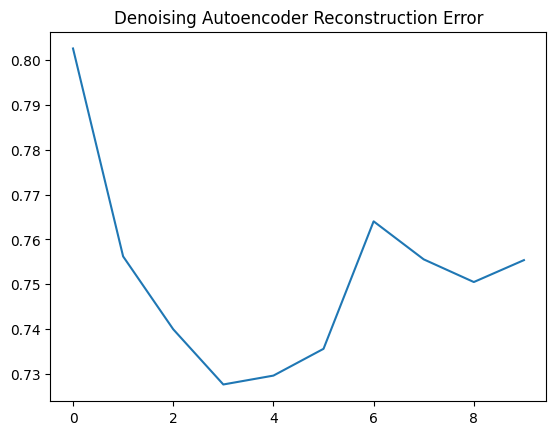

In [3]:
model = nn.DenoisingAutoencoder([TRAIN_IN.shape[0], 80, 40, 20, 2])
errors = model.train(TRAIN_IN, TRAIN_IN, 0.00001, 10, 0.8, 0.8)

plt.title("Denoising Autoencoder Reconstruction Error")
plt.plot(range(len(errors)), errors)
plt.show()

In [4]:
TRAIN_OUT = np.genfromtxt('data/mnist_train_targets.csv', delimiter=',', skip_header=1, dtype=int)

In [5]:
pts_x = []
pts_y = []
pts_c = []

for i in range(TRAIN_IN.shape[1]):
    pt = model.encode(TRAIN_IN[:,i])
    pts_x.append(pt[0])
    pts_y.append(pt[1])
    pts_c.append(int(TRAIN_OUT[i]))

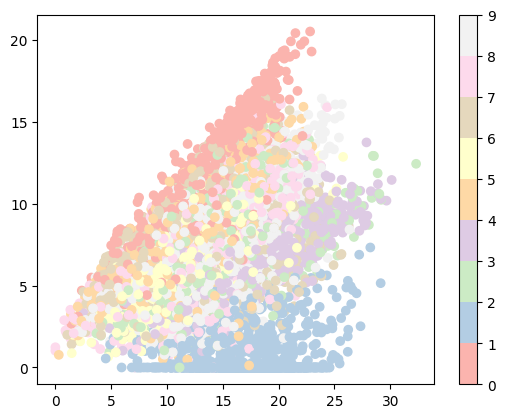

In [6]:
plt.scatter(pts_x, pts_y, c=pts_c, cmap="Pastel1")
plt.colorbar()
plt.show()

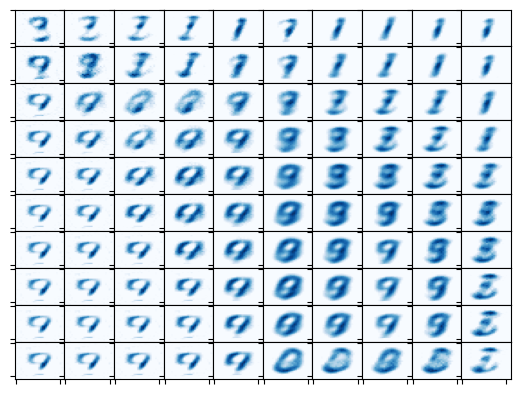

In [7]:
f = plt.figure()
mx = np.max(pts_x)
my = np.max(pts_y)
for i in range(10):
    for j in range(10):
        cell = model.decode([(i/10) * mx, (j/10) * my])
        ax = f.add_subplot(10, 10, i + (10*j) + 1)
        plt.imshow(np.reshape(cell, (int(np.sqrt(TRAIN_IN.shape[0])), int(np.sqrt(TRAIN_IN.shape[0])))), cmap="Blues")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect("auto")
plt.subplots_adjust(wspace=0, hspace=0, )